# k-means クラスタリング分析 (色の特定)
## k-means クラスタリングとは？
- K-meansとは、クラスタリングのアルゴリズム。教師なし。
- 実行速度が速く拡張性がある
- クラスター(かたまり)の重心がどんどん移動する。

### 学習ステップ
1. テキトーな位置にかたまりの中心(=重心)をいくつか決める (このときデータ数よりクラスターの個数が小さい = データ一つにつきクラスター一つという1to1にならない)
2. データポイント (各点)と重心の距離を計算
3. 近い方のクラスターにデータが所属する。
4. 2.と3.を繰り返す。クラスターが変動しなければ終わり。

## どうやって色の特定をするの？
- rgb値の距離が近いものは色が似ている→ノルムで考える
- rgb空間の3次元空間 = lab空間
    - 明度をL*、色相と彩度を示す色度をa*、b
- 色を画像から抽出 -> クラスター数を決めて、それぞれのクラスターに対するrgb値を特定 -> lab値に変換し色と彩度を特定

この方法だと彩度もわかるので陽の陰りにも対応できる可能性がある。


In [9]:
import numpy as np
import cv2
import os
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:

def load_image(image_file):
    # cv2 load images as BGR
    image_bgr=[cv2.imread(image_file+'/'+i) for i in os.listdir(image_file)]
    image_rgb = [cv2.cvtColor(i, cv2.COLOR_BGR2RGB) for i in image_bgr]
    image_rgb = [cv2.resize(i, (150, 150)) for i in image_rgb]
    return image_rgb


img = load_image("/Users/maykanda/Desktop")
img=np.reshape(img, (len(img),150,150,3))
hstack=np.hstack(img)
plt.imshow(hstack)
plt.show()

# 主成分分析 (方向、奥行きの特定)

## 主成分分析って？(教師なし)
- あるもの A を特定するのに、Aが持つ特徴(=特徴量)を抽出し、その組み合わせからAを特定しようという試み。
- Aと強い関係を持つ特徴量しか扱わないのでデータの次元や計算コストが低くなる。
- データクリーニングが必要。

### 学習ステップ
- データの分散を求め、

## どうやって方向、奥行きの特定をするの?

1. カラー情報を白黒情報に変換し、特徴量を減らす。
2. 物体の輪郭を２次元（x座標、y座標）の点として認識。
3. 輪郭の点（x, y）の集まりに対して主成分分析（ＰＣＡ）
4. 主成分方向のベクトル（固有ベクトル）を求め画像に描画
5. 各物体に対して１～４を繰り返し


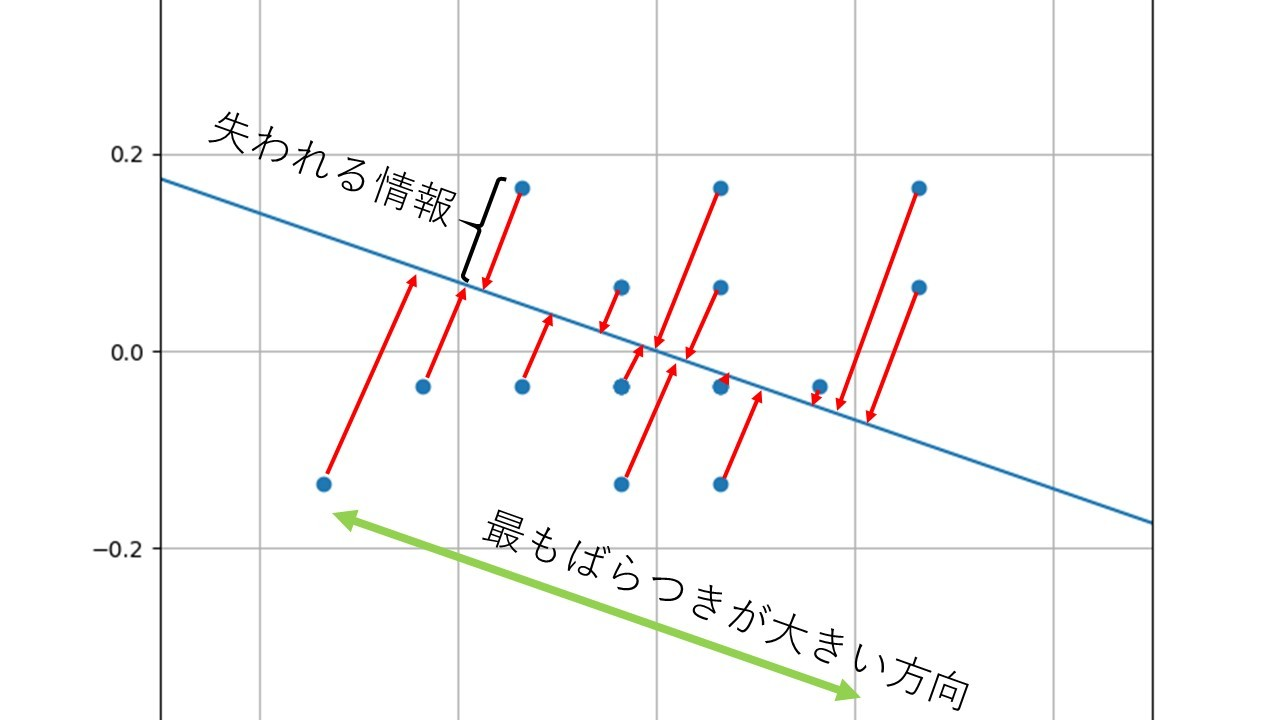

In [4]:
from IPython.display import Image
Image("pca_kaisetsu_fig1.jpeg")

- モデル(あおい線)に2次元の情報をもつデータポイントが写像されるイメージ
- このモデルはデータがばらつくように設定